In [16]:
import os
import sys
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
sys.path.append('/Users/iwatobipen/develop/chemoenv/psikit/psikit/')

In [17]:
from psikit import Psikit

pk=Psikit(debug=True,threads=1,memory=12)

In [18]:
#read furan molecule from smiles 

pk.read_from_smiles('c1ccoc1')

In [19]:
pk.optimize()

Optimizer: Optimization complete!


-228.63251961878225

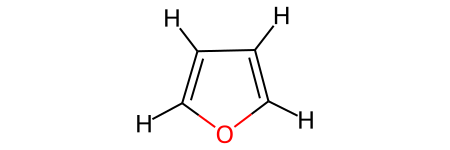

In [20]:
pk.mol

In [21]:
#calculate charges
print(pk.calc_resp_charges())
print(pk.calc_mulliken_charges())
print(pk.calc_lowdin_charges())

[-0.20064017 -0.18016181 -0.05822393 -0.16828382 -0.03936546  0.1599184
  0.15634757  0.16789878  0.16251042]
[-0.22308677 -0.22308677  0.16885478 -0.5434091   0.16885478  0.15964933
  0.15964934  0.1662872   0.1662872 ]
[-0.16312921 -0.16362472  0.0210836  -0.18181121  0.02098566  0.11590996
  0.11649324  0.11680956  0.11728311]


In [22]:
mol = pk.mol
atoms = mol.GetAtoms()

In [23]:
data = {'Symbol':[atom.GetSymbol() for atom in atoms],
        'RESP': [float(atom.GetProp('RESP')) for atom in atoms],
        'MULLIKEN': [float(atom.GetProp('MULLIKEN')) for atom in atoms],
       'LOWDIN':  [float(atom.GetProp('LOWDIN')) for atom in atoms]}

In [24]:
df = pd.DataFrame(data)

In [25]:
df.round(3)

,Symbol,RESP,MULLIKEN,LOWDIN
0,C,-0.201,-0.223,-0.163
1,C,-0.180,-0.223,-0.164
2,C,-0.058,0.169,0.021
3,O,-0.168,-0.543,-0.182
4,C,-0.039,0.169,0.021
5,H,0.160,0.160,0.116
6,H,0.156,0.160,0.116
7,H,0.168,0.166,0.117
8,H,0.163,0.166,0.117


In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

In [27]:
plt.style.use('ggplot')

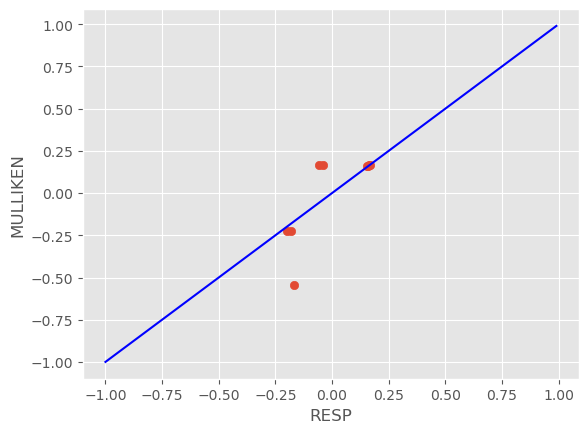

In [28]:
# RESP charge and MULLIKEN charge shows high correlation
plt.scatter(df.RESP, df.MULLIKEN)
plt.xlabel('RESP')
plt.ylabel('MULLIKEN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

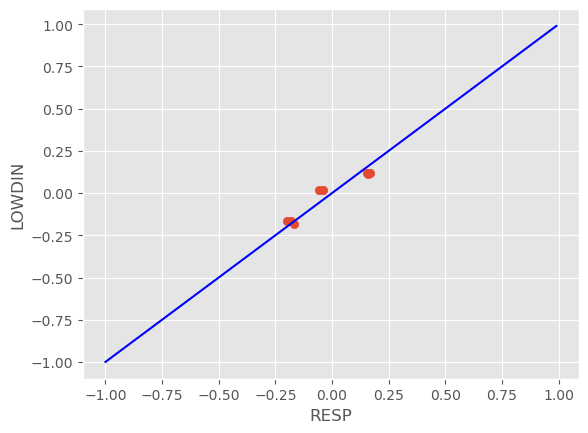

In [29]:
plt.scatter(df.RESP, df.LOWDIN)
plt.xlabel('RESP')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

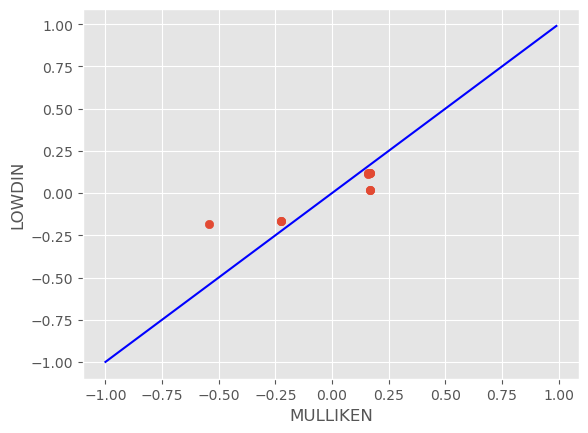

In [30]:
plt.scatter(df.MULLIKEN, df.LOWDIN)
plt.xlabel('MULLIKEN')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

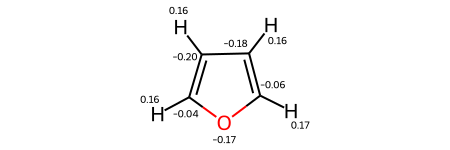

In [39]:
# BONUS: label the atoms with their RESP charges

for atom in pk.mol.GetAtoms():
    label = '%.2f'%float((atom.GetProp('RESP')))
    atom.SetProp('atomNote', label)  
    
pk.mol

partial charges make intuitive sense because the most negative values are assigned to oxygen (an electronegative atom) and sp2-hybridized carbons with high electron density